### Please complete the following sections sequentially to complete this assignment.

##### <span style="color:red">Note: You can create as many code or markdown cells as you deem necessary to answer each question. However, please leave the problems unchanged. We will evaluate your solutions by executing your code sequentially.</span> 

---
**For this assignment, we will use the following dataset that summarizes the usage behavior of about 9000 active credit cardholders during a six-month period. The dataset contains 18 behavioral variables.**

**<span style="color:red">The objective of this assignment is to cluster the cardholders based on their credit card data. </span> The assignment's dataset is included in the homework's zipped folder. The table below has the description of each variable in the dataset.**

| Variable                       | Description                                                                                                                 |
|--------------------------------|-----------------------------------------------------------------------------------------------------------------------------|
| CUSTID                         | Identification of Credit Card holder (Categorical)                                                                          |
| BALANCE                        | Balance amount left in their account to make purchases                                                                      |
| BALANCEFREQUENCY               | How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)           |
| PURCHASES                      | Amount of purchases made from account                                                                                       |
| ONEOFFPURCHASES                | Maximum purchase amount done in one-go                                                                                      |
| INSTALLMENTSPURCHASES          | Amount of purchase done in installment                                                                                      |
| CASHADVANCE                    | Cash in advance given by the user                                                                                           |
| PURCHASESFREQUENCY             | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) |
| ONEOFFPURCHASESFREQUENCY       | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)                   |
| PURCHASESINSTALLMENTSFREQUENCY | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)                      |
| CASHADVANCEFREQUENCY           | How frequently the cash in advance being paid                                                                               |
| CASHADVANCETRX                 | Number of Transactions made with "Cash in Advanced"                                                                         |
| PURCHASESTRX                   | Numbe of purchase transactions made                                                                                         |
| CREDITLIMIT                    | Limit of Credit Card for user                                                                                               |
| PAYMENTS                       | Amount of Payment done by user                                                                                              |
| MINIMUM_PAYMENTS               | Minimum amount of payments made by user                                                                                     |
| PRCFULLPAYMENT                 | Percent of full payment paid by user                                                                                        |
| TENURE                         | Tenure of credit card service for user                                                                                      |

---
### Introduction to Hierarchical Clustering

**1- Watch this [video](https://ohiouniversity.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=94bdb57c-adfc-46af-97db-acee0062db9c) for an intorudction to hierarchical clustering and answer the following questions.**

**2- What is the difference between supervised and unsupervised learning problems? (5 pts)**

Supervised learning uses labeled data to predict specific outputs while unsupervised learning deals with unlabled data. Unsupervised learning finds patterns without specific output goals in mind.

**3- What is standardization? Briefly explain how data is standardized. (5 pts)**

Standardization is a preprocessing technique where you rescale features to have a mean of zero and a standard deviation of one. It ensures that all features of the data are on a similar scale.

**4- What is normalization? Briefly explain how data is normalized. (5 pts)**

Normalization is a preprocessing technique the scales the features in a dataset to a range between 0 and 1. The focus of this process is to make sure that all features have a consistent scale and prevents any single feature from dominating due to its larger magnitude.

**5- Why are standardization and normalization needed for clustering? (5 pts)**

These processes are needed to ensure that all features contribute equally by placing them on a consistent scale. This prevents features with larger scales from dominating the clustering process. This allows for more accurate identification of patterns within the data.

**6- Briefly describe the overall process of hierarchical clustering. (15 pts)**

This process is a bottom-up approach that starts out by assigning each data point to its own cluster, and then merging the closest clusters until all points belong in a single cluster. This creates a tree-like structure, or a dendrogram, that shows the relationships between clusters at different levels of distance.

**7- What is a dendrogram? Describe its structure and its usage in hierarchical clustering. (10 pts)**

A dendrogram is a tree-like diagram that illustrates the arrangements of clusters and their merging sequence. It displays hierarchical relationships between data points. Dendrograms help in visualizing the clustering process and determining the number of clusters by identifying appropriate cut-off points based on distances.

**8- How is a dendrogram used to determine the number of clusters? (5 pts)**

The number of clusters are determined by identifying vertical lines wehre the fusion of clusters occurs at varying heights. The optimal number of clusters is determined based on the problem's requirements or the desired similarity level.

**9- What is the silhouette score, and how is it used to determine the number of clusters? (10 pts)**

The silhouette score measures the quality of clustering by assessing the compactness and separation between clusters. A higher score indicates better-defined clusters, and it is used to determine the optimal number of clusters by selecting the number that maximizes the score.

---
### Hierarchical Clustering in Python

**10- Watch this [video](https://ohiouniversity.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=779161e0-10f7-4fa0-80e3-acee0062ee5d) to learn about hierarchical clustering in Python. The video's dataset is included in the assignment zipped folder, in case you want to replicate the codes.**

**11- Read the assignment's dataset into Python and import all necessary packages. (5 pts)**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import linkage, dendrogram

df = pd.read_csv("credit_card_clustering.csv")
df.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


**12- Delete any observation that has at least one missing value. (5 pts)**

In [5]:
df = df.dropna(axis=1)

**13- Use a pairplot to visualize ```PURCHASES_FREQUENCY```, ```CASH_ADVANCE_FREQUENCY```, and ```PRC_FULL_PAYMENT```. (10 pts)**

C:\Users\garre\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


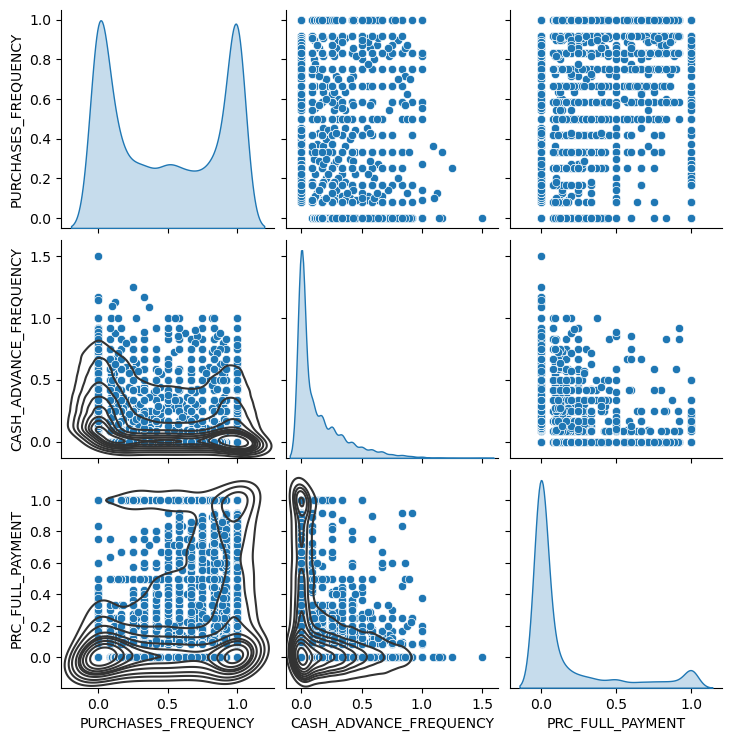

In [10]:
g = sns.pairplot(data=df[["PURCHASES_FREQUENCY", "CASH_ADVANCE_FREQUENCY", "PRC_FULL_PAYMENT"]], diag_kind="kde")
g.map_lower(sns.kdeplot, color=".2")
plt.show()

**14- Standardize the data. Make sure that ```CUST_ID``` is not used as it is just the row number. (20 pts)**

In [11]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [13]:
X = df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']]

scaler = StandardScaler()
scaler.fit(X)
standardized = scaler.transform(X)
standardized

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.52897879,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.81864213,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.38380474,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.5706145 ,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.58053567,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.57686873,
        -0.52555097, -4.12276757]])

**15- Normalize the data. Make sure that ```CUST_ID``` is not used as it is just the row number. (20 pts)**

In [15]:
X = df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']]

scaler = MinMaxScaler()
scaler.fit(X)
normalized = scaler.transform(X)
normalized

array([[2.14779454e-03, 8.18182000e-01, 1.94536779e-03, ...,
        3.97863135e-03, 0.00000000e+00, 1.00000000e+00],
       [1.68169097e-01, 9.09091000e-01, 0.00000000e+00, ...,
        8.08933873e-02, 2.22222000e-01, 1.00000000e+00],
       [1.31026136e-01, 1.00000000e+00, 1.57662475e-02, ...,
        1.22643641e-02, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.22871936e-03, 8.33333000e-01, 2.94456089e-03, ...,
        1.60229492e-03, 2.50000000e-01, 0.00000000e+00],
       [7.06688341e-04, 8.33333000e-01, 0.00000000e+00, ...,
        1.03604933e-03, 2.50000000e-01, 0.00000000e+00],
       [1.95717777e-02, 6.66667000e-01, 2.22932216e-02, ...,
        1.24533826e-03, 0.00000000e+00, 0.00000000e+00]])

**16- Cluster the NORMALIZED data using hierarchical clustering and form 5 clusters. Then calculate the silhouette score for your clustering solution. (10 pts)**

In [19]:
clm = AgglomerativeClustering(n_clusters=5).fit(normalized)
silhouette_score(normalized, clm.labels_)

0.26115790955008933

**17- What does the silhouette score indicate about the quality of the clustering solution? (10 pts)**

This is detecting weak structure in the clustering solution. If the score were higher then I would be able to have more confidence in the clustering solution. 

**18- Determine the number of clusters using the silhouette score and visualize the results? Try 2 to 10 clusters to find the best one. Note: this might take some time to finish executing. Please be patient. (30 pts)**

In [21]:
n_clusts = list(range(2, 11))
sils = []
for n in n_clusts:
    slm = AgglomerativeClustering(n_clusters=n).fit(normalized)
    sils.append(silhouette_score(normalized, clm.labels_))

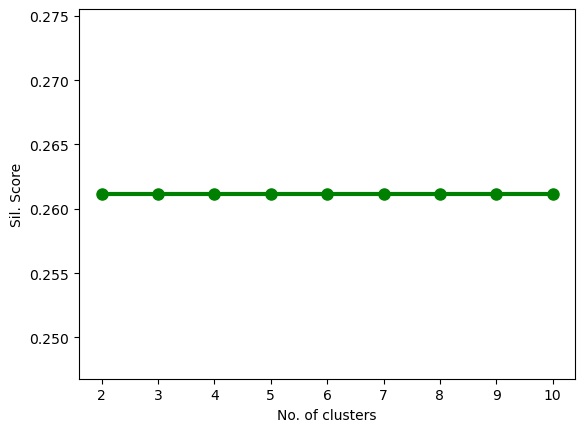

In [24]:
fig, ax = plt.subplots()
ax.plot(n_clusts, sils, color="green", marker="o", linewidth=3, markersize=8)
ax.set(xlabel="No. of clusters", ylabel="Sil. Score")
plt.show()

**19- Cluster the data using hierarchical clustering and the number of clusters you obtained in previous steps. Calculate the silhouette score for your clustering solution. (10 pts)**

In [27]:
clm = AgglomerativeClustering(n_clusters=2).fit(normalized)
silhouette_score(normalized, clm.labels_)

0.32585610145691557

**20- Generate a dendrogram for the normalized data with five levels and depicts as many clusters as you obtained using the silhouette score. (15 pts)**

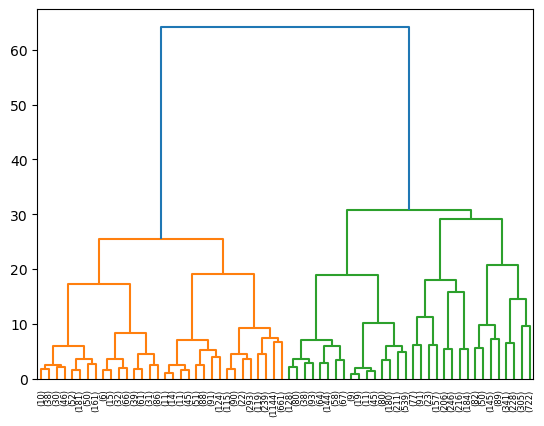

In [26]:
link = linkage(normalized, method="ward")
dend = dendrogram(link, p=5, truncate_mode="level")
plt.show()

**21- Use a pairplot to visualize ```PURCHASES_FREQUENCY```, ```CASH_ADVANCE_FREQUENCY```, and ```PRC_FULL_PAYMENT``` with clusters that you created using hierarchical clustering.  (10 pts)**

C:\Users\garre\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


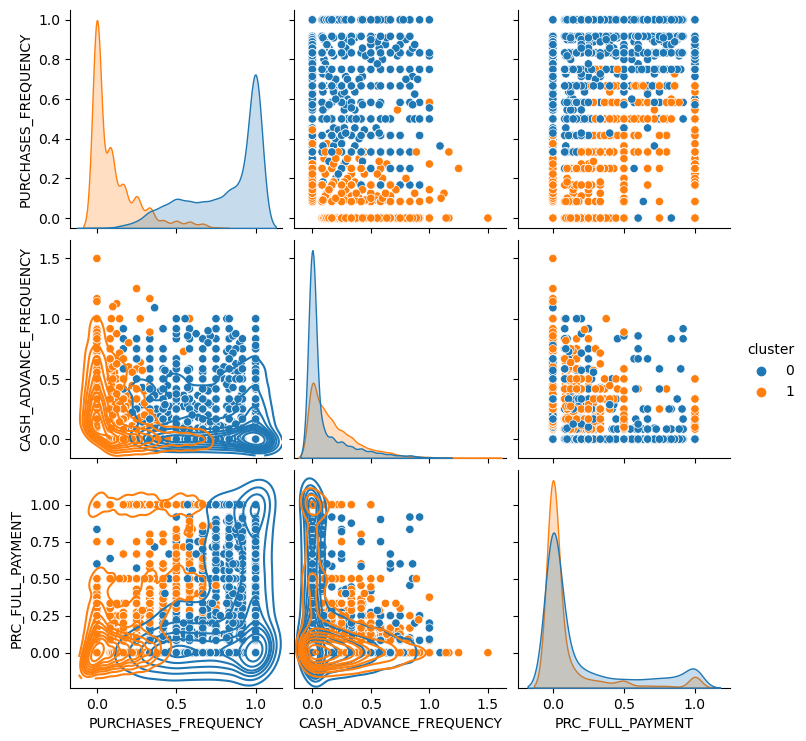

In [29]:
df["cluster"] = clm.labels_
g = sns.pairplot(data=df[["PURCHASES_FREQUENCY", "CASH_ADVANCE_FREQUENCY", "PRC_FULL_PAYMENT", "cluster"]], hue="cluster", diag_kind="kde")
g.map_lower(sns.kdeplot, color=".2")
plt.show()

**22- What does the result of clustering cardholders reveal about their behavior? (15 pts)**

You can conclude that the red cluster has higher risk. And you would want to target the blue cluster as your target market. The blue cluster has a slightly higher skewed average when compared to the red cluster.

---
### Bonus Question

**23- Do some research and find two other methods of determining the number of clusters and briefly explain them. (15 pts)**

In [ ]:
#Two other methods include the elbow method and gap statistics. The elbow method assesses the point in a plot variance 
#against the number of clusters where ther rate of decrease significantly slows,resembling and elbow. Gap statistics
#compares the within-cluster dispersion of the original data to a reference null distribution. Both methods aid in 
#identifying an appropriate number of clustersin data analysis.